In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modelos
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [201]:
#abrindo os dataframes
dados_escolares = pd.read_csv('DadosEscolares1996-2015.csv', encoding = 'latin1')
rendimento = pd.read_csv('RendimentoEscolar2000-2015.csv', encoding = 'latin1')
esc_rmsp = pd.read_csv('ESC2013_RMSP_CEM.csv', encoding = 'latin1')
nota = pd.read_csv('ENEM2015.csv')

C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,8,11,17,18,19,20,111,240) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\giova\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Limpando as colunas que não são float64 do dataframe dados_escolares:

In [202]:
esc_rmsp.loc[:, esc_rmsp.dtypes == "object"]

,NOMEESC,NOMEMUN,NOMDIST,TIP_DEP,BAIRRO,END_ESC,NUM_ESC,DDD,TELEFONE,INSE_CL
0,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,BARNABES,Estadual,BAIRRO DOS BARNABES,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,Medio Alto
1,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,BARNABES,Municipal,BARNABES,RUA ANTONIO SOARES GODINHO,31,11,46841666,NaN
2,TERRA NOVA EM,JUQUITIBA,BARNABES,Municipal,BARNABES,R ANTONIO SOARES GODINHO,35,11,46841462,NaN
3,BAIRRO DOS BARNABES,JUQUITIBA,BARNABES,Estadual,BARNABES,R ANTONIO SOARES GODINHO,413,11,46841155,Medio
4,BAIRRO DAS SENHORINHAS,JUQUITIBA,BARNABES,Estadual,SENHORINHAS,RUA DOS LAGOS,20,11,46812769,Medio
5,BAIRRO VITALINO,JUQUITIBA,BARNABES,Estadual,VITALINO,ESTR CACHOEIRA DO FRANCA,100,11,46841138,NaN
6,BAIRRO NOSSA SENHORA DA CONCEICAO,JUQUITIBA,JUQUITIBA,Estadual,NOSSA SENHORA CONCEICAO,RUA OSWALDO BARBOSA GUIMARAES,400,11,46814350,Medio
7,RAIZES DO PAU BRASIL EM,JUQUITIBA,JUQUITIBA,Municipal,CENTRO,RUA 28 DE MARCO,10,11,46813013,Medio Alto
8,OREDO RODRIGUES DA CRUZ,JUQUITIBA,JUQUITIBA,Estadual,CENTRO,AV 31 DE MARCO,111,11,46814664,Medio
9,SOL NASCENTE CENTRO MUNICIPAL DE HABILITACAO E...,JUQUITIBA,JUQUITIBA,Municipal,CENTRO,AV JUSCELINO K DE OLIVEIRA,130,11,46814278,NaN


In [203]:
esc_rmsp.drop(['NOMEESC','NOMEMUN', 'NOMDIST', 'BAIRRO', 'END_ESC', 'NUM_ESC', 'DDD', 'TELEFONE'], axis = 1, inplace = True)
esc_rmsp.loc[:, esc_rmsp.dtypes == "object"]

,TIP_DEP,INSE_CL
0,Estadual,Medio Alto
1,Municipal,NaN
2,Municipal,NaN
3,Estadual,Medio
4,Estadual,Medio
5,Estadual,NaN
6,Estadual,Medio
7,Municipal,Medio Alto
8,Estadual,Medio
9,Municipal,NaN


In [204]:
print(esc_rmsp.TIP_DEP.value_counts())
print(esc_rmsp.INSE_CL.value_counts())

Privada      5225
Municipal    3405
Estadual     2303
Federal         4
Name: TIP_DEP, dtype: int64
Medio Alto     2683
Alto           1017
Muito Alto      596
Medio           236
Medio Baixo       1
Name: INSE_CL, dtype: int64


In [205]:
dic = {'Medio Baixo':1, 'Medio':2, 'Medio Alto':3, 'Alto':4, 'Muito Alto': 5}
esc_rmsp.INSE_CL = esc_rmsp.INSE_CL.map(dic)
esc_rmsp.INSE_CL.value_counts()

3.0    2683
4.0    1017
5.0     596
2.0     236
1.0       1
Name: INSE_CL, dtype: int64

In [206]:
esc_rmsp = pd.get_dummies(esc_rmsp, columns = ['TIP_DEP'], drop_first = True)
print('número de colunas que não são float: ',sum(esc_rmsp.dtypes != 'float64'))

número de colunas que não são float:  39


In [207]:
for col in esc_rmsp.columns:
    if esc_rmsp[col].dtype != 'float64':
        esc_rmsp[col] = esc_rmsp[col].astype("float64")
print('número de colunas que não são float: ',sum(esc_rmsp.dtypes != 'float64'))

número de colunas que não são float:  0


In [208]:
esc_rmsp.isna().mean().sort_values(ascending = False)

COD_SC               1.000000
MAT05_AF             0.958124
NP05_AF              0.958124
LP05_AF              0.958124
IDEB05AF             0.958124
MAT05_AI             0.918991
LP05_AI              0.918991
IDEB05AI             0.918991
NP05_AI              0.918991
RED_EN13             0.896315
MAT_EN13             0.896315
CH_EN13              0.896315
CN_EN13              0.896315
ENEM2013             0.896315
LC_EN13              0.896315
LP13_AI              0.845844
IDEB13AI             0.845844
NP13_AI              0.845844
MAT13_AI             0.845844
DI3EM_07             0.836153
DI3EM_08             0.831032
DI3EM_09             0.826278
IDEB07AF             0.822895
MAT07_AF             0.822895
NP07_AF              0.822895
LP07_AF              0.822895
DI3EM_10             0.821249
DI3EM_11             0.814849
MAT09_AF             0.812563
IDEB09AF             0.812563
                       ...   
LOCALIZA             0.000000
COD_DEP              0.000000
LONGITUDE 

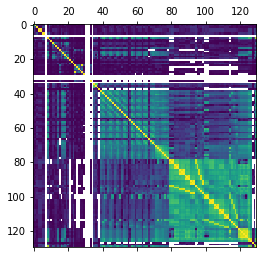

In [209]:
plt.matshow(esc_rmsp.corr().abs())

In [210]:
# Create correlation matrix
corr_matrix = esc_rmsp.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop.remove('INSE_AB')
# Drop features 
esc_rmsp.drop(list(to_drop), axis=1, inplace = True)

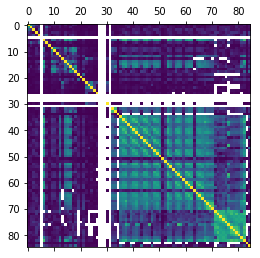

In [211]:
plt.matshow(esc_rmsp.corr().abs())
plt.show()

In [212]:
esc_rmsp.shape

(10937, 85)

In [213]:
esc_rmsp = esc_rmsp[esc_rmsp.CODESC.isin(nota['CODIGO DA ENTIDADE'])]

In [214]:
esc_rmsp.isna().mean().sort_values(ascending =False)

COD_SC               1.000000
MAT05_AF             0.995977
MAT05_AI             0.992759
MAT13_AI             0.961384
MAT09_AI             0.950925
MAT07_AI             0.950121
MAT11_AI             0.946903
MAT07_AF             0.732100
MAT13_AF             0.728077
MAT11_AF             0.727273
MAT09_AF             0.727273
AP5EF_07             0.424779
DI3EM_07             0.415929
AP5EF_08             0.407884
AP5EF_11             0.406275
AP5EF_09             0.403057
AP5EF_13             0.403057
AP5EF_12             0.397426
AP5EF_14             0.397426
AP5EF_10             0.395817
DI3EM_11             0.297667
AP3EM_07             0.258246
DI3EM_14             0.246179
DI3EM_13             0.244570
RED_EN13             0.224457
AP3EM_08             0.223652
AP9EF_07             0.218021
AB1EM_07             0.205953
AP9EF_08             0.194690
AP3EM_09             0.183427
                       ...   
BIBLIO               0.000000
QD_ESP_D             0.000000
LAB_INF   

In [215]:
esc_rmsp.drop(esc_rmsp.columns[esc_rmsp.isna().mean() > 0.1], axis = 1, inplace=  True)
esc_rmsp.isna().mean().sort_values(ascending =False)

APR3EM_11            0.076428
AB1EM_10             0.076428
AP3EM_12             0.069187
AB1EM_11             0.047466
INSE_AB              0.043443
AP3EM_13             0.038616
AB1EM_12             0.027353
AP3EM_14             0.023331
AB1EM_13             0.008045
AB1EM_14             0.007241
REG_IN_CR            0.000000
QD_ESP_D             0.000000
BIBLIO               0.000000
ENS_REG              0.000000
TIP_DEP_Municipal    0.000000
REG_IN_PE            0.000000
REG_FU_8A            0.000000
LAB_INF              0.000000
QD_ESP_C             0.000000
CODESC               0.000000
LOCALIZA             0.000000
CEP                  0.000000
COD_DEP              0.000000
CODMUN               0.000000
REG_MED              0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
REG_FU_9A            0.000000
ESP_IN_CR            0.000000
REG_MED_I            0.000000
ESP_MED_N            0.000000
EJA_PROJ             0.000000
EJA_MED              0.000000
EJA       

In [216]:
esc_rmsp.dropna(how = 'any', inplace = True)
esc_rmsp.shape

(1111, 46)

In [217]:
nota.rename({'CODIGO DA ENTIDADE':'CODESC'}, axis = 1, inplace = True)

In [236]:
data_target = pd.merge(esc_rmsp, nota, on='CODESC')
data = data_target.drop(['CODESC', 'NUMERO DE PARTICIPANTES', 'Classificacao'], axis = 1)
colunas = list(data.columns)
target = data_target.Classificacao

In [243]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
score = 0
coefs = np.zeros(data.shape[1])
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = True)
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    print('Treinamento ', i+1)
    print('\tScore de treino:', lm.score(x_train, y_train))
    print('\tScore de treino:', lm.score(x_test, y_test))
    coefs = coefs + lm.coef_
    score += lm.score(x_test, y_test)
print('Score médio:', score/5)
col_param = list(zip(coefs/5, colunas))
col_param.sort(reverse = True)
for (a,b) in col_param:
    print(b,a)

Treinamento  1
	Score de treino: 0.5164360257021533
	Score de treino: 0.5271379735494384
Treinamento  2
	Score de treino: 0.5216531845121598
	Score de treino: -4.293065721571346e+23
Treinamento  3
	Score de treino: 0.5295985733169629
	Score de treino: 0.45544034137690914
Treinamento  4
	Score de treino: 0.5150365937549017
	Score de treino: 0.4951293329515751
Treinamento  5
	Score de treino: 0.5175103330928102
	Score de treino: 0.5326964113961211
Score médio: -8.586131443142692e+22
ESP_IN_CR 39238966804.96715
ESP_FU_8A 1354554.0107472553
ESP_MED 220804.8721069336
EJA_PROJ 0.7686019897460937
INSE_AB 0.5110505229457759
EJA_MED 0.10372853479597444
LONGITUDE 0.024814216532600387
ENS_ESP 0.023935564368705912
QD_ESP_D 0.02005905769623944
BIBLIO 0.019421786871773834
AB1EM_10 0.016535344911520627
REG_MED_P 0.015096654685301131
REG_IN_PE 0.014943953474505962
AP3EM_14 0.011008628213880968
AP3EM_13 0.010990326620498606
AP3EM_12 0.010478883142279929
REG_MED_I 0.009075719583086967
LAB_INF 0.00128924

In [256]:
colunas_corr = list(data_target.corr().Classificacao.abs().sort_values(ascending = False).reset_index()['index'])

In [266]:
data1 = data_target[colunas_corr[1:10]]
colunas = list(data1.columns)

In [267]:
data1.head()

,INSE_AB,COD_DEP,REG_FU_8A,AB1EM_13,APR3EM_11,BIBLIO,AP3EM_13,AP3EM_12,AB1EM_12
0,60.7539,4.0,0.0,0.0,94.4,0.0,100.0,100.0,0.0
1,49.3944,2.0,0.0,5.2,89.2,0.0,97.9,91.2,6.3
2,52.0052,2.0,0.0,5.9,95.1,0.0,98.4,98.6,5.1
3,50.5632,2.0,0.0,13.1,72.4,0.0,90.7,87.0,7.3
4,54.6762,2.0,1.0,6.5,63.4,0.0,92.1,90.4,11.8


In [268]:
scaler = StandardScaler()
data1 = scaler.fit_transform(data1)
score = 0
coefs = np.zeros(data1.shape[1])
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(data1, target, test_size = 0.2, shuffle = True)
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    print('Treinamento ', i+1)
    print('\tScore de treino:', lm.score(x_train, y_train))
    print('\tScore de treino:', lm.score(x_test, y_test))
    coefs = coefs + lm.coef_
    score += lm.score(x_test, y_test)
print('Score médio:', score/5)
col_param = list(zip(coefs/5, colunas))
col_param.sort(reverse = True)
for (a,b) in col_param:
    print(b,a)

Treinamento  1
	Score de treino: 0.5029085463856596
	Score de treino: 0.5053117226031578
Treinamento  2
	Score de treino: 0.5119839125227879
	Score de treino: 0.45538985572632246
Treinamento  3
	Score de treino: 0.5098026524164296
	Score de treino: 0.4679451820886701
Treinamento  4
	Score de treino: 0.5131823295591706
	Score de treino: 0.45630201993699504
Treinamento  5
	Score de treino: 0.5086559300079653
	Score de treino: 0.48199848178415416
Score médio: 0.47338945242785996
INSE_AB 0.5178192319696151
BIBLIO 0.04051587053831672
AP3EM_13 0.004295142695136978
APR3EM_11 0.002842681939161088
AP3EM_12 0.0005656823612848439
AB1EM_12 -0.006147207815523805
AB1EM_13 -0.018343168910635324
REG_FU_8A -0.08198067645857472
COD_DEP -0.1673690361823542
